In [203]:
#Create a logistic Regrassion model using titanic dataset

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
%matplotlib inline
import seaborn as sns

In [206]:
data= pd.read_excel("D:\\machine learning\\Datasets\\titanic3.xls")

In [207]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<AxesSubplot:>

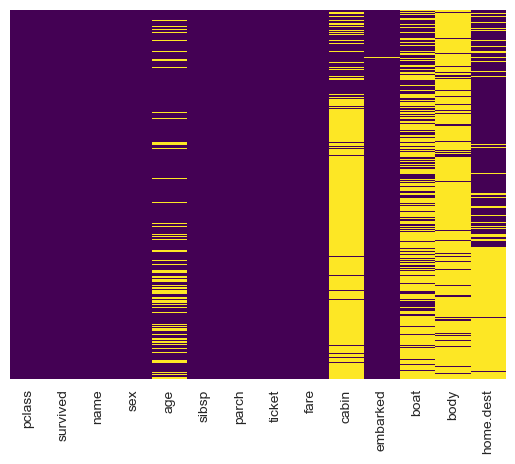

In [209]:
#Using heatmap graph we basically show which coloum have missing value
sns.heatmap(data.isnull(), yticklabels=False, cbar= False, cmap="viridis")

<AxesSubplot:xlabel='survived', ylabel='count'>

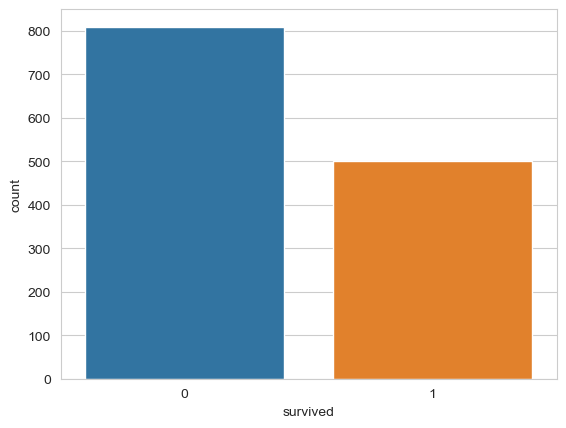

In [210]:
sns.set_style("whitegrid")
sns.countplot(x="survived", data= data)

<AxesSubplot:xlabel='survived', ylabel='count'>

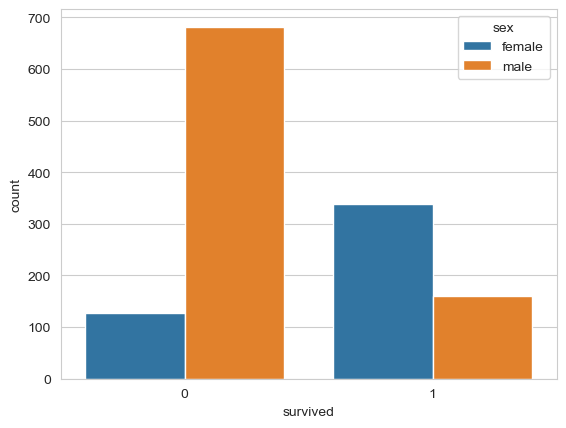

In [211]:
sns.countplot(x= "survived", hue= "sex", data= data)

<AxesSubplot:xlabel='survived', ylabel='count'>

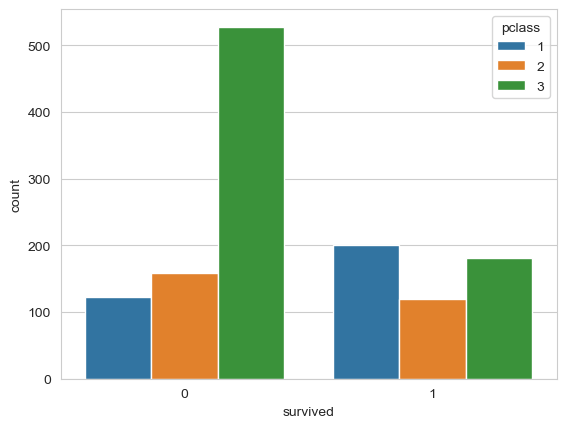

In [212]:
sns.countplot(x= "survived", hue= "pclass", data= data)

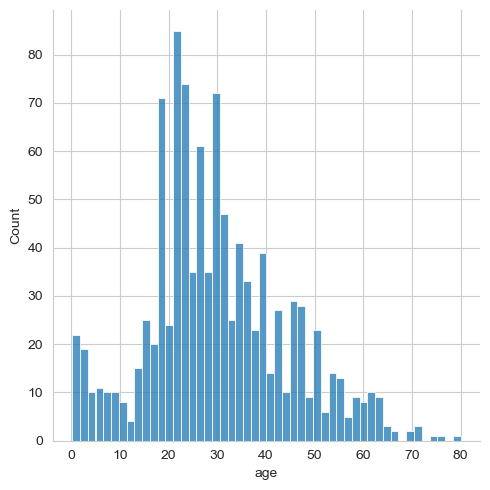

In [213]:
sns.displot(data["age"], bins= 50)

In [214]:
import cufflinks as cf
cf.go_offline()

In [215]:
data["fare"].iplot(kind="hist")

<AxesSubplot:xlabel='pclass', ylabel='age'>

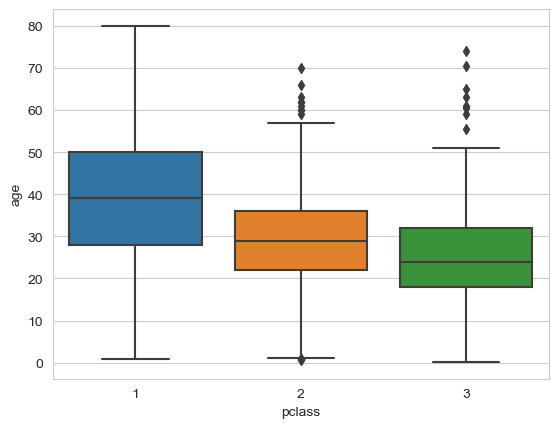

In [216]:

sns.boxplot(data= data,  x="pclass", y="age")

In [217]:
#Start data preprossing 

In [218]:
#fill missing value from boxplot graph, i take passenger class average age to fill this misssing value
def impute_age(cols):
    age= cols[0]
    pclass= cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 39
        elif pclass==2:
            return 29
        else: 
            return 24
    
    else: 
        return age

In [219]:
data["age"]= data[["age", "pclass"]].apply(impute_age, axis=1)

<AxesSubplot:>

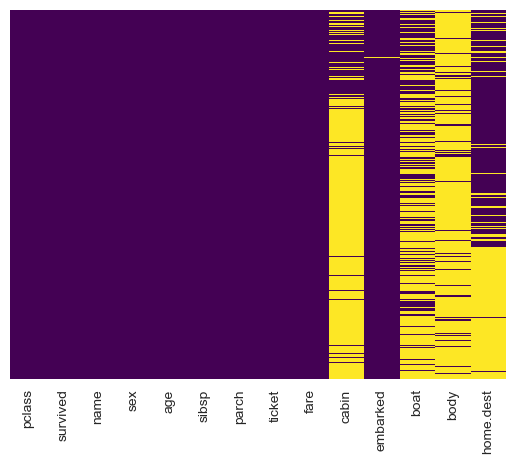

In [220]:
#just see this graph there were no missig value in age coloum
sns.heatmap(data.isnull(), yticklabels=False, cbar= False, cmap="viridis")

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [222]:
#this coloum has too much misssing value thats why i deleted this coloum
data.drop(columns=["cabin", "boat","body","home.dest"], axis=1, inplace=True)

In [223]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


<AxesSubplot:>

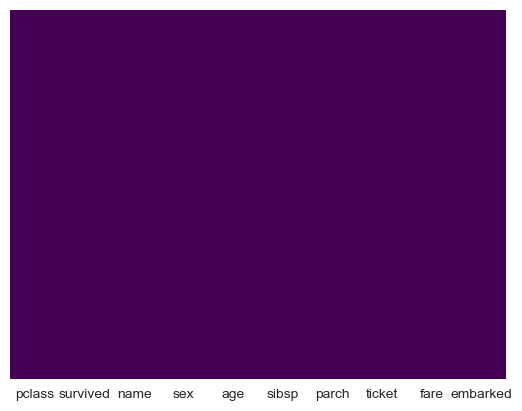

In [224]:
sns.heatmap(data.isnull(), yticklabels=False, cbar= False, cmap="viridis")

In [225]:
#check missing vallue coloum there were some missing value in fare and embarked coloum
print(data.isnull().sum())

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    2
dtype: int64


In [226]:
#find missig value index number
missing_value_mask = data.isnull()

# Get the index numbers where missing values are True
missing_value_indices = data.index[missing_value_mask.any(axis=1)].tolist()

print("Missing value indices:", missing_value_indices)

Missing value indices: [168, 284, 1225]


In [227]:
#delete missing value row from dataset you can also delete missing value from a coloum
data.dropna(inplace=True)

In [228]:
#covert categorical variablle to numeric variale
sex= pd.get_dummies(data["sex"], drop_first=True)
embark= pd.get_dummies(data["embarked"], drop_first=True)

In [229]:
sex

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [230]:
embark

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


In [231]:
#jon this converted numerical coloum into dataset
data= pd.concat([data, sex, embark], axis=1)

In [232]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,0,1


In [233]:
data.drop(["sex", "name", "ticket", "embarked"], axis=1, inplace=True)

In [234]:
data.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1


In [235]:
#here y our predicted variable that is survived coloum, and all feature variable
X= data.drop("survived", axis=1)
y= data["survived"]

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
lgmodel= LogisticRegression()

In [240]:
lgmodel.fit(X_train, y_train)

C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [241]:
prediction= lgmodel.predict(X_test)

In [242]:
#model evalueation
from sklearn.metrics import classification_report

In [243]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       239
           1       0.76      0.69      0.72       153

    accuracy                           0.79       392
   macro avg       0.78      0.77      0.78       392
weighted avg       0.79      0.79      0.79       392



In [244]:
from sklearn.metrics import confusion_matrix

In [245]:
cm= confusion_matrix(y_test, prediction)

<AxesSubplot:>

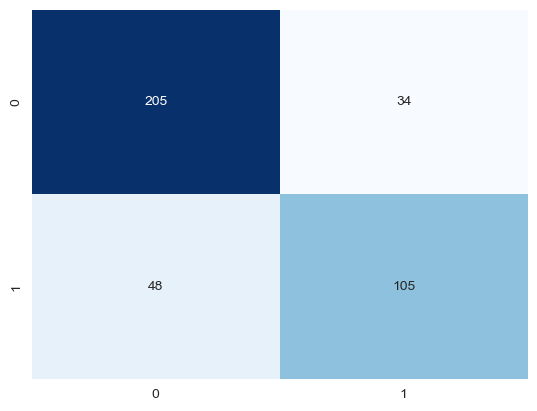

In [246]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)